<a href="https://colab.research.google.com/github/ARCH2006/Neural-Network-Regression-Model/blob/main/torchmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn #neuralnetwork
import torch.optim as optim #optimizer to adjust weights
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset1 = pd.read_csv("tensordata.csv")
X = dataset1[['input']].values
y = dataset1[['output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler() #for scaling 0,1
X_train = scaler.fit_transform(X_train) #atleast once it should fitted
X_test = scaler.transform(X_test)


In [ ]:
#convert into tensors(if working in tensor no need)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name:
# Register Number:
#defining the class
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.fc2 = nn.Linear(8,10)
        self.fc3 = nn.Linear(10,1)
        #activation func
        self.relu = nn.ReLU()
        self.history = {'loss' : []}
  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x) #no activation func in O/P
    return x

        # Include your code here




In [ ]:
ai_brain = NeuralNet() #ai_brain is a model
criterion = nn.MSELoss() #loss func
optimizer = optim.RMSprop(ai_brain.parameters(), lr=0.001) #to adjust the weighs

In [ ]:
# Initialize the Model, Loss Function, and Optimizer
# Write your code here
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
  for epoch in range(epochs): #epoch is a iterator
    optimizer.zero_grad()
    loss = criterion(ai_brain(X_train), y_train)
    loss.backward() #adjusting according to loss
    optimizer.step()

    ai_brain.history['loss'].append(loss.item())
    if epoch % 200 == 0:
      print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [ ]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer) #training the model

Epoch [0/2000], Loss: 30478.927734
Epoch [200/2000], Loss: 29344.031250
Epoch [400/2000], Loss: 27158.818359
Epoch [600/2000], Loss: 23806.974609
Epoch [800/2000], Loss: 19452.431641
Epoch [1000/2000], Loss: 14507.250000
Epoch [1200/2000], Loss: 9652.606445
Epoch [1400/2000], Loss: 5770.184570
Epoch [1600/2000], Loss: 3631.344482
Epoch [1800/2000], Loss: 3022.696533


In [ ]:
#testing the data
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 3897.560059


In [ ]:
loss_df = pd.DataFrame(ai_brain.history)

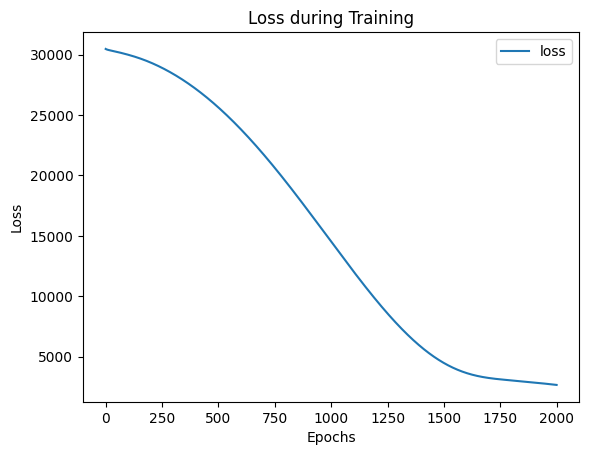

In [ ]:
#representing the loss
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
#prediction
X_n1_1 = torch.tensor([[10]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 142.84461975097656
